# Fitting Spatial Extension of IC443

This tutorial demonstrates how to perform a measurement of spatial extension with the [extension](http://fermipy.readthedocs.org/en/latest/advanced/extension.html) method in the [fermipy](http://fermipy.readthedocs.org) package.  This tutorial assumes that you have first gone through the [PG 1553](pg1553.ipynb) analysis tutorial.

## Get the Data and Setup the Analysis

In [1]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from fermipy.gtanalysis import GTAnalysis
from fermipy.plotting import ROIPlotter

In this thread we will use a pregenerated data set which is contained in a tar archive in the *data* directory of the *fermipy-extra* repository.

In [2]:
if os.path.isfile('../data/ic443.tar.gz'):
    !tar xzf ../data/ic443.tar.gz
else:
    !curl -OL https://raw.githubusercontent.com/fermiPy/fermipy-extras/master/data/ic443.tar.gz
    !tar xzf ic443.tar.gz

We first instantiate a GTAnalysis instance using the config file in the ic443 directory and the run the setup() method.  This will prepare all of the ancillary files and create the pylikelihood instance for binned analysis.  Note that in this example these files have already been generated so the routines that will normally be executed to create these files will be skipped.

In [3]:
gta = GTAnalysis('ic443/config.yaml')
matplotlib.interactive(True)
gta.setup()

2017-04-02 19:24:54 INFO    GTAnalysis.__init__(): 
--------------------------------------------------------------------------------
fermipy version 0.14.0+3.g8cc8.dirty 
ScienceTools version ScienceTools-11-05-02
2017-04-02 19:25:00 INFO    GTAnalysis.setup(): Running setup.
2017-04-02 19:25:00 INFO    GTBinnedAnalysis.setup(): Running setup for component 00
2017-04-02 19:25:00 INFO    GTBinnedAnalysis._select_data(): Skipping data selection.
2017-04-02 19:25:00 INFO    GTBinnedAnalysis.setup(): Using external LT cube.
2017-04-02 19:25:01 INFO    GTBinnedAnalysis._create_expcube(): Skipping gtexpcube.
2017-04-02 19:25:01 INFO    GTBinnedAnalysis._create_srcmaps(): Skipping gtsrcmaps.
2017-04-02 19:25:01 INFO    GTBinnedAnalysis.setup(): Finished setup for component 00
2017-04-02 19:25:01 INFO    GTBinnedAnalysis._create_binned_analysis(): Creating BinnedAnalysis for component 00.
2017-04-02 19:25:13 INFO    GTAnalysis.setup(): Initializing source properties
2017-04-02 19:25:23 INFO   

## Print the ROI model

We can print the ROI object to see a list of sources in the model along with their distance from the ROI center (offset), TS, and number of predicted counts (Npred).  Since we haven't yet fit any sources, the ts of all sources will initially be set to nan.

In [4]:
gta.print_roi()

2017-04-02 19:25:23 INFO    GTAnalysis.print_roi(): 
name                SpatialModel   SpectrumType     offset        ts       npred
--------------------------------------------------------------------------------
3FGL J0617.2+2234e  SpatialMap     LogParabola       0.000       nan     11302.5
3FGL J0619.4+2242   PointSource    PowerLaw          0.536       nan       248.8
3FGL J0609.3+2131   PointSource    LogParabola       2.105       nan       356.0
3FGL J0609.2+2051c  PointSource    PowerLaw          2.524       nan       165.1
3FGL J0621.0+2514   PointSource    PowerLaw          2.804       nan       172.9
3FGL J0611.5+1957   PointSource    PowerLaw          2.931       nan       204.8
3FGL J0603.8+2155   PointSource    PowerLaw          3.166       nan        64.1
3FGL J0628.4+2429   PointSource    PowerLaw          3.214       nan        15.5
3FGL J0605.9+2039c  PointSource    PowerLaw          3.263       nan        38.6
3FGL J0601.5+2309   PointSource    PowerLaw          3.6

Now we will run the optimize() method.  This method refits the spectral parameters of all sources in the ROI and gives us baseline model that we can use as a starting point for fitting the spatial extension.

In [5]:
gta.optimize()

2017-04-02 19:25:23 INFO    GTAnalysis.optimize(): Starting
/opt/conda/lib/python2.7/site-packages/scipy/interpolate/fitpack2.py:224: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)
2017-04-02 19:25:31 INFO    GTAnalysis.optimize(): Finished
2017-04-02 19:25:31 INFO    GTAnalysis.optimize(): LogLike: -48962.777742 Delta-LogLike: 73.650909


{'config': {'max_free_sources': 5,
  'npred_frac': 0.95,
  'npred_threshold': 1.0,
  'optimizer': {'init_lambda': 0.0001,
   'max_iter': 100,
   'min_fit_quality': 2,
   'optimizer': 'MINUIT',
   'retries': 3,
   'tol': 0.001,
   'verbosity': 0},
  'shape_ts_threshold': 25.0,
  'skip': []},
 'dloglike': 73.6509089404426,
 'loglike0': -49036.42865141046,
 'loglike1': -48962.77774247002}

In [6]:
gta.print_roi()

2017-04-02 19:25:31 INFO    GTAnalysis.print_roi(): 
name                SpatialModel   SpectrumType     offset        ts       npred
--------------------------------------------------------------------------------
3FGL J0617.2+2234e  SpatialMap     LogParabola       0.000  34209.81     10879.4
3FGL J0619.4+2242   PointSource    PowerLaw          0.536     48.56       284.3
3FGL J0609.3+2131   PointSource    LogParabola       2.105     45.21       194.5
3FGL J0609.2+2051c  PointSource    PowerLaw          2.524     28.51       139.2
3FGL J0621.0+2514   PointSource    PowerLaw          2.804     84.42       155.4
3FGL J0611.5+1957   PointSource    PowerLaw          2.931     15.83        76.7
3FGL J0603.8+2155   PointSource    PowerLaw          3.166     37.77        58.3
3FGL J0628.4+2429   PointSource    PowerLaw          3.214      1.32        16.2
3FGL J0605.9+2039c  PointSource    PowerLaw          3.263     20.91       125.7
3FGL J0601.5+2309   PointSource    PowerLaw          3.6

To check the quality of the ROI model fit we can generate a residual map with the residmap method.  This will produce smoothed maps of the counts distribution and residuals (counts-model) using a given spatial kernel.  The spatial kernel can be defined with a source dictionary.  In the following example we use a PointSource with a PowerLaw index of 2.0.

In [7]:
resid = gta.residmap('ic443_roifit',model={'SpatialModel' : 'PointSource', 'Index' : 2.0})

2017-04-02 19:25:31 INFO    GTAnalysis.residmap(): Generating residual maps
2017-04-02 19:25:32 INFO    GTAnalysis.add_source(): Adding source residmap_testsource
2017-04-02 19:25:34 INFO    GTAnalysis.delete_source(): Deleting source residmap_testsource
2017-04-02 19:25:35 INFO    GTAnalysis.residmap(): Finished residual maps


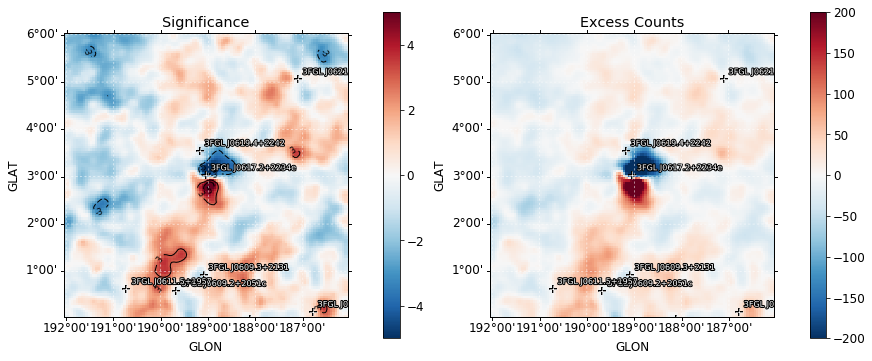

In [8]:
o = resid
fig = plt.figure(figsize=(14,6))
ROIPlotter(o['sigma'],roi=gta.roi).plot(vmin=-5,vmax=5,levels=[-5,-3,3,5,7,9],subplot=121,cmap='RdBu_r')
plt.gca().set_title('Significance')
ROIPlotter(o['excess'],roi=gta.roi).plot(vmin=-200,vmax=200,subplot=122,cmap='RdBu_r')
plt.gca().set_title('Excess Counts')

We can see the effect of removing sources from the model by running *residmap* with the *exclude* option.  Here we generate a residual map with the source 3FGL J0621.0+2514 removed from the model.

In [9]:
resid_noj0621 = gta.residmap('ic443_roifit_noj0621',
                model={'SpatialModel' : 'PointSource', 'Index' : 2.0},
                exclude=['3FGL J0621.0+2514'])

2017-04-02 19:25:37 INFO    GTAnalysis.residmap(): Generating residual maps
2017-04-02 19:25:37 INFO    GTAnalysis.add_source(): Adding source residmap_testsource
2017-04-02 19:25:40 INFO    GTAnalysis.delete_source(): Deleting source residmap_testsource
2017-04-02 19:25:40 INFO    GTAnalysis.residmap(): Finished residual maps


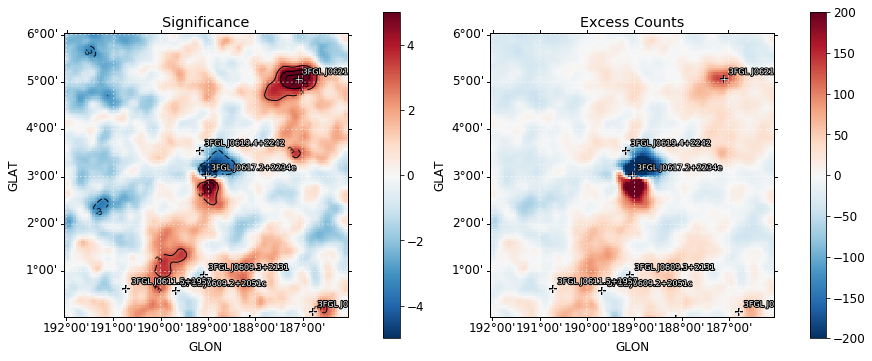

In [10]:
o = resid_noj0621
fig = plt.figure(figsize=(14,6))
ROIPlotter(o['sigma'],roi=gta.roi).plot(vmin=-5,vmax=5,levels=[-5,-3,3,5,7,9],subplot=121,cmap='RdBu_r')
plt.gca().set_title('Significance')
ROIPlotter(o['excess'],roi=gta.roi).plot(vmin=-200,vmax=200,subplot=122,cmap='RdBu_r')
plt.gca().set_title('Excess Counts')

We can get alternative assessment of the model by generating a TS map of the region.  Again we see a hotspot at the position of 3FGL J0621.0+2514 which we excluded from the model.

In [11]:
tsmap_noj0621 = gta.tsmap('ic443_noj0621',
                model={'SpatialModel' : 'PointSource', 'Index' : 2.0},
                exclude=['3FGL J0621.0+2514'])

2017-04-02 19:25:41 INFO    GTAnalysis.tsmap(): Generating TS map
2017-04-02 19:25:44 INFO    GTAnalysis._make_tsmap_fast(): Fitting test source.
2017-04-02 19:25:58 INFO    GTAnalysis.tsmap(): Finished TS map


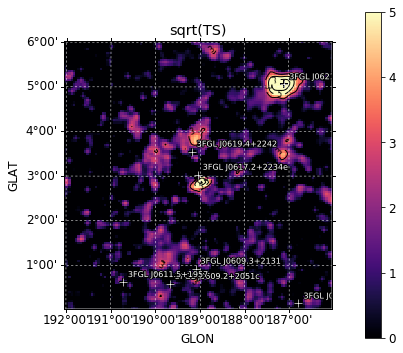

In [12]:
o = tsmap_noj0621

fig = plt.figure(figsize=(6,6))
ROIPlotter(o['sqrt_ts'],roi=gta.roi).plot(vmin=0,vmax=5,levels=[3,5,7,9],subplot=111,cmap='magma')
plt.gca().set_title('sqrt(TS)')

## Measuring Source Extension

After optimizing the model we are ready to run an extension analysis on IC 443.  As reported in [Abdo et al. 2010](http://adsabs.harvard.edu/cgi-bin/bib_query?arXiv:1002.2198), this source has a spatial extension of 0.27 deg $\pm$ 0.01 (stat).  We can run an extension test of this source by calling the *extension* method with the source name.  The extension method has a number of options which can be changed at runtime by passing keyword arguments.  To see the default settings we can look at the extension sub-dictionary of the config property of our GTAnalysis instance.

In [13]:
import pprint
pprint.pprint(gta.config['extension'])

{'fit_ebin': False,
 'fit_position': False,
 'free_background': False,
 'free_radius': None,
 'make_plots': False,
 'psf_scale_fn': None,
 'save_model_map': False,
 'spatial_model': 'RadialGaussian',
 'sqrt_ts_threshold': None,
 'update': False,
 'width': [],
 'width_max': 1.0,
 'width_min': 0.00316,
 'width_nstep': 26,
 'write_fits': True,
 'write_npy': True}


By default the method will use a 2D Gaussian source template and scan the width parameter between 0.00316 and 1 degrees in 26 steps.  The *width* parameter can be used to provide an explicit  vector of points for the scan.  Since we know the extension of IC 443 is well localized around 0.27 deg we use a width vector centered around this point.  The analysis results are returned as an output dictionary and are also written to the internal source object of the GTAnalysis instance.

In [14]:
ext_gauss = gta.extension('3FGL J0617.2+2234e',width=np.linspace(0.25,0.30,11).tolist())
gta.write_roi('ext_gauss_fit')

2017-04-02 19:25:59 INFO    GTAnalysis.extension(): Running extension fit for 3FGL J0617.2+2234e
2017-04-02 19:26:09 INFO    GTAnalysis._extension(): Fitting extended-source model.
2017-04-02 19:26:13 INFO    GTAnalysis._extension(): Best-fit extension: 0.2732 + 0.0037 - 0.0034
2017-04-02 19:26:13 INFO    GTAnalysis._extension(): TS_ext:        4110.222
2017-04-02 19:26:13 INFO    GTAnalysis._extension(): Extension UL: 0.2796
2017-04-02 19:26:38 INFO    GTAnalysis.extension(): Finished extension fit.
2017-04-02 19:26:38 INFO    GTBinnedAnalysis.write_xml(): Writing /workdir/fermipy-extra/notebooks/ic443/ext_gauss_fit_00.xml...
2017-04-02 19:26:38 INFO    GTAnalysis.write_fits(): Writing /workdir/fermipy-extra/notebooks/ic443/ext_gauss_fit.fits...
2017-04-02 19:26:39 INFO    GTAnalysis.write_roi(): Writing /workdir/fermipy-extra/notebooks/ic443/ext_gauss_fit.npy...


To inspect the results of the analysis we can make a plot of the likelihood profile.  From this we can see that the spatial extension is in good agreement with the value from Abdo et al. 2010.  

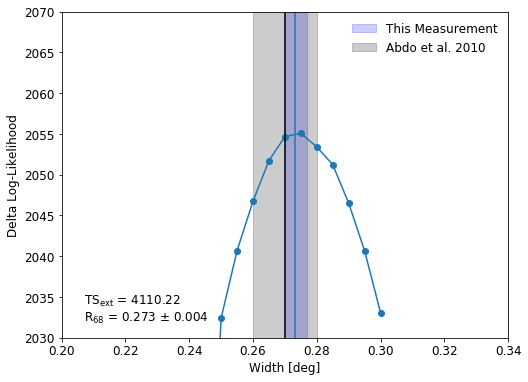

In [15]:
plt.figure(figsize=(8,6))
plt.plot(ext_gauss['width'],ext_gauss['dloglike'],marker='o')
plt.gca().set_xlabel('Width [deg]')
plt.gca().set_ylabel('Delta Log-Likelihood')
plt.gca().axvline(ext_gauss['ext'])
plt.gca().axvspan(ext_gauss['ext']-ext_gauss['ext_err_lo'],ext_gauss['ext']+ext_gauss['ext_err_hi'],
                      alpha=0.2,label='This Measurement',color='b')

plt.gca().axvline(0.27,color='k')
plt.gca().axvspan(0.27-0.01,0.27+0.01,alpha=0.2,label='Abdo et al. 2010',color='k')
plt.gca().set_ylim(2030,2070)
plt.gca().set_xlim(0.20,0.34)

plt.annotate('TS$_{\mathrm{ext}}$ = %.2f\nR$_{68}$ = %.3f $\pm$ %.3f'%
            (ext_gauss['ts_ext'],ext_gauss['ext'],ext_gauss['ext_err']),xy=(0.05,0.05),xycoords='axes fraction')
plt.gca().legend(frameon=False)

As an additional cross-check we can look at what happens when we free sources and rerun the extension analysis.

In [16]:
ext_gauss_free = gta.extension('3FGL J0617.2+2234e',width=np.linspace(0.25,0.30,11).tolist(),free_radius=1.0)
print 'Fixed Sources: %f +/- %f'%(ext_gauss['ext'],ext_gauss['ext_err'])
print 'Free Sources:  %f +/- %f'%(ext_gauss_free['ext'],ext_gauss_free['ext_err'])

2017-04-02 19:26:40 INFO    GTAnalysis.extension(): Running extension fit for 3FGL J0617.2+2234e
2017-04-02 19:26:57 INFO    GTAnalysis._extension(): Fitting extended-source model.
2017-04-02 19:27:07 INFO    GTAnalysis._extension(): Best-fit extension: 0.2735 + 0.0038 - 0.0038
2017-04-02 19:27:07 INFO    GTAnalysis._extension(): TS_ext:        3919.111
2017-04-02 19:27:07 INFO    GTAnalysis._extension(): Extension UL: 0.2797
2017-04-02 19:27:34 INFO    GTAnalysis.extension(): Finished extension fit.


Fixed Sources: 0.273219 +/- 0.003514
Free Sources:  0.273465 +/- 0.003772
